### Import Section

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sns.set_theme(style="darkgrid")
sns.set(style='darkgrid', context='talk', palette='rainbow')

### Loading Pandas DataFrame & selecting a Chunk of data

In [41]:
data_path='D:/codespace/python/Zomato-Restaurant-Review/data/zomato.csv'
dataframe = pd.read_csv(data_path, encoding="ISO-8859-1" ,usecols=['Country Code','City','Aggregate rating','Rating text','Votes'])

print(f"dataset {dataframe.shape}")
dataframe = dataframe[dataframe["Country Code"] == 1].reset_index(drop=True)

dataframe.head()

dataset (9551, 5)


,Country Code,City,Aggregate rating,Rating text,Votes
0,1,Agra,3.9,Good,140
1,1,Agra,3.5,Good,71
2,1,Agra,3.6,Good,94
3,1,Agra,4.0,Very Good,87
4,1,Agra,4.2,Very Good,177


### Ploting Graph Side by side

##### Rotating axis ticks

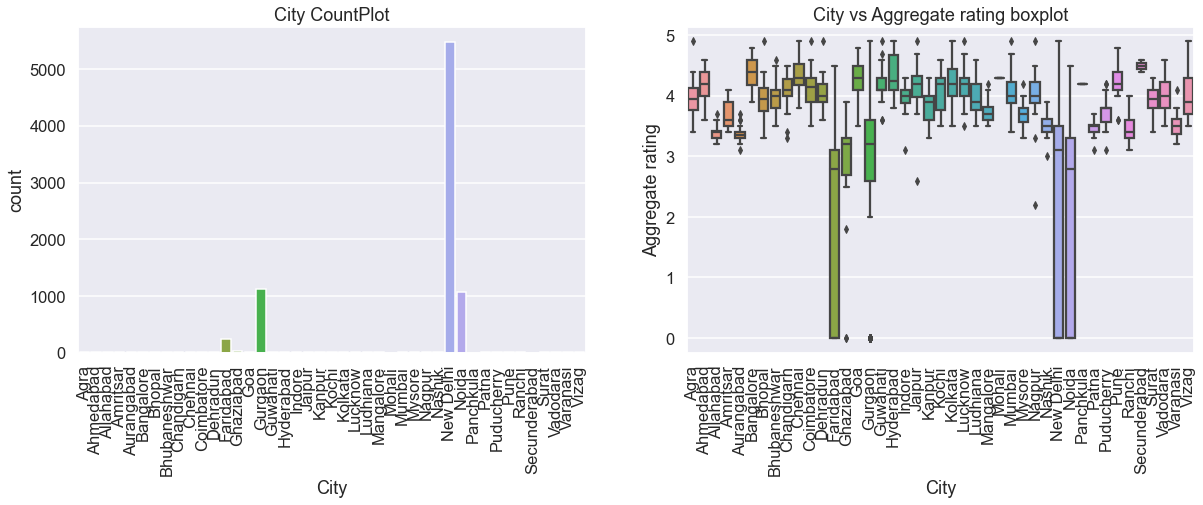

In [50]:
fig, (axs1, axs2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

sns.countplot(x="City", data=dataframe, ax=axs1)

axs1.tick_params(axis="x", rotation=90)

axs1.set_title("City CountPlot")

sns.boxplot(y="Aggregate rating", x="City", data=dataframe, ax=axs2)

axs2.tick_params(axis="x", rotation=90)

axs2.set_title("City vs Aggregate rating boxplot")

plt.show()

##### Adding axis labels

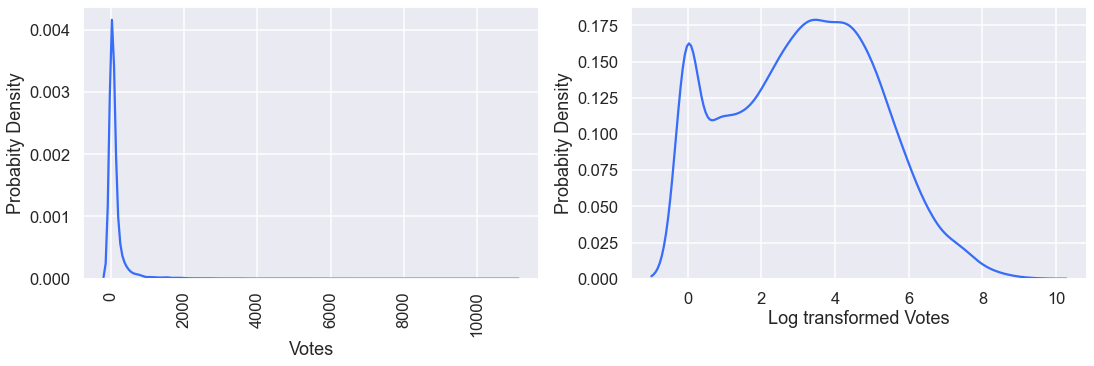

In [44]:
fig, (axs1, axs2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

data_in_arry = dataframe["Votes"].values

sns.kdeplot(x=data_in_arry, ax=axs1)

axs1.tick_params(axis="x", rotation=90)

axs1.set_xlabel('Votes')
axs1.set_ylabel('Probabity Density')

log_transformed = np.log(data_in_arry+1)

sns.kdeplot(x=log_transformed,  ax=axs2)

axs2.set_xlabel('Log transformed Votes')
axs2.set_ylabel('Probabity Density')

plt.show()

##### Plotting 4 graphs

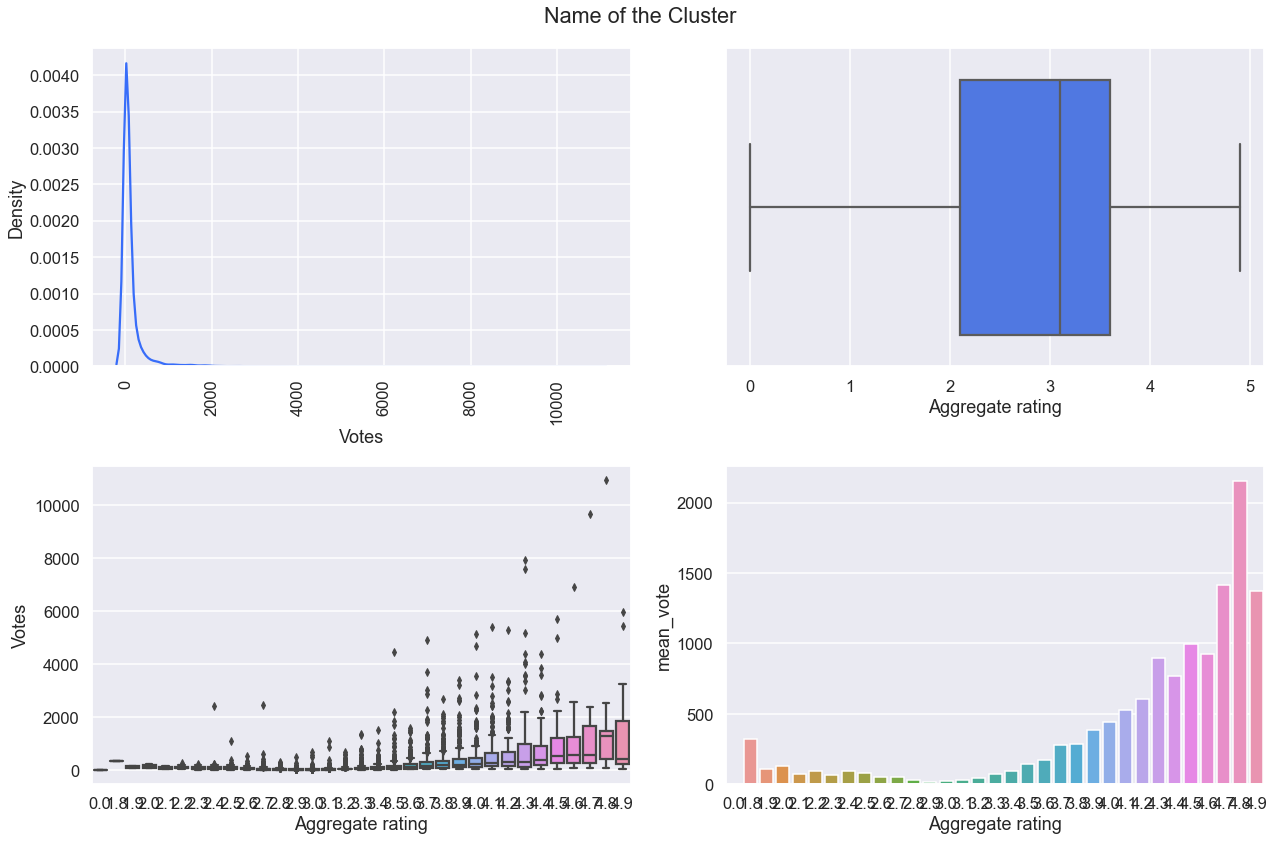

In [51]:
fig, (axs1, axs2) = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

sns.kdeplot(x="Votes", data=dataframe, ax=axs1[0])

axs1[0].tick_params(axis="x", rotation=90)

sns.boxplot(x="Aggregate rating", data=dataframe, ax=axs1[1])

sns.boxplot(y="Votes", x="Aggregate rating", data=dataframe, ax=axs2[0])


sns.barplot(
    x="Aggregate rating",
    y="mean_vote",
    data=dataframe.groupby(["Aggregate rating"])
    .agg(mean_vote=("Votes", "mean"))
    .reset_index(),
    ax=axs2[1],
)


plt.suptitle('Name of the Cluster')
plt.tight_layout()
plt.show()